In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings(action="ignore")

In [2]:
%matplotlib inline

In [3]:
from src.eda_src import get_bad_rate, calculate_ks_corr

In [4]:
X_train = pd.read_csv('data/train.csv')

In [5]:
X_train.shape

(7173, 14)

## EDA

In [6]:
features = [
        'ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
        'region', 'category', 'sub_category', 'sales', 'quantity', 'discount'
]

target = 'profit'


In [7]:
X_train = X_train[X_train.columns.drop(['id', 'country'])]

In [8]:
X_train.dtypes

ship_mode        object
segment          object
city             object
state            object
postal_code       int64
region           object
category         object
sub_category     object
sales           float64
quantity          int64
discount        float64
profit          float64
dtype: object

Correlation

In [9]:
corr = X_train[['sales', 'discount', 'profit']].corr()
corr.style.background_gradient(cmap='coolwarm')

,sales,discount,profit
sales,1.000000,-0.030771,0.621893
discount,-0.030771,1.000000,-0.205416
profit,0.621893,-0.205416,1.000000


Categorical features

In [10]:
for feature in X_train.select_dtypes(include=['object','category']).columns.tolist():
    print(f'{feature}: {X_train[feature].nunique()}')
    X_train[feature] = pd.Categorical(X_train[feature], categories=X_train[feature].unique())

ship_mode: 4
segment: 3
city: 396
state: 38
region: 4
category: 3
sub_category: 17


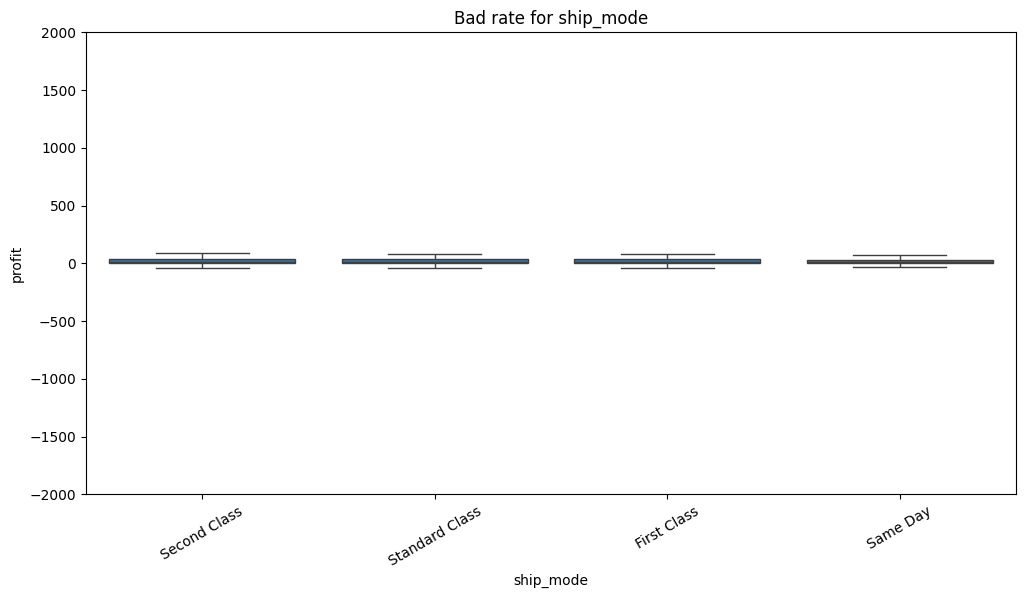

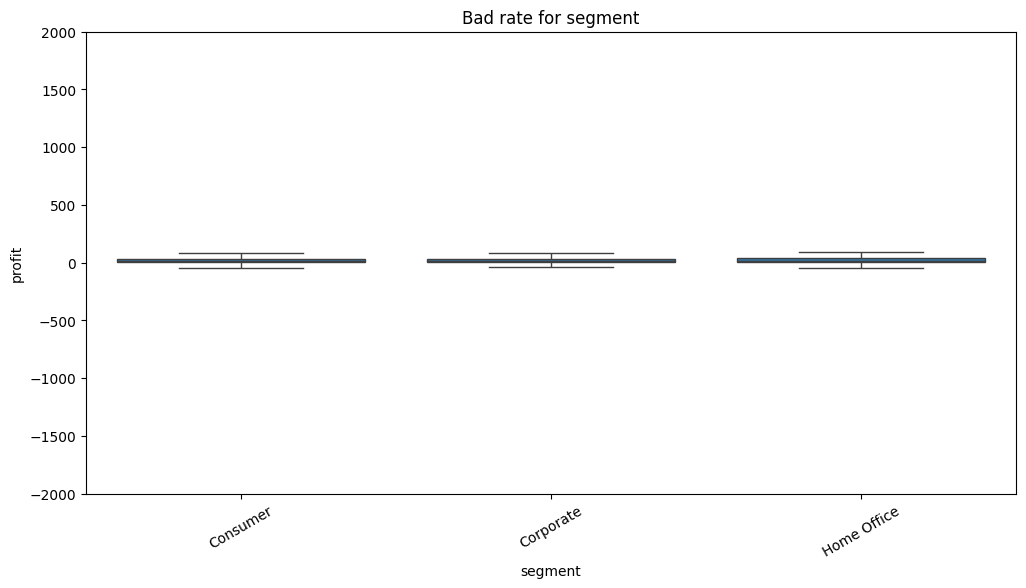

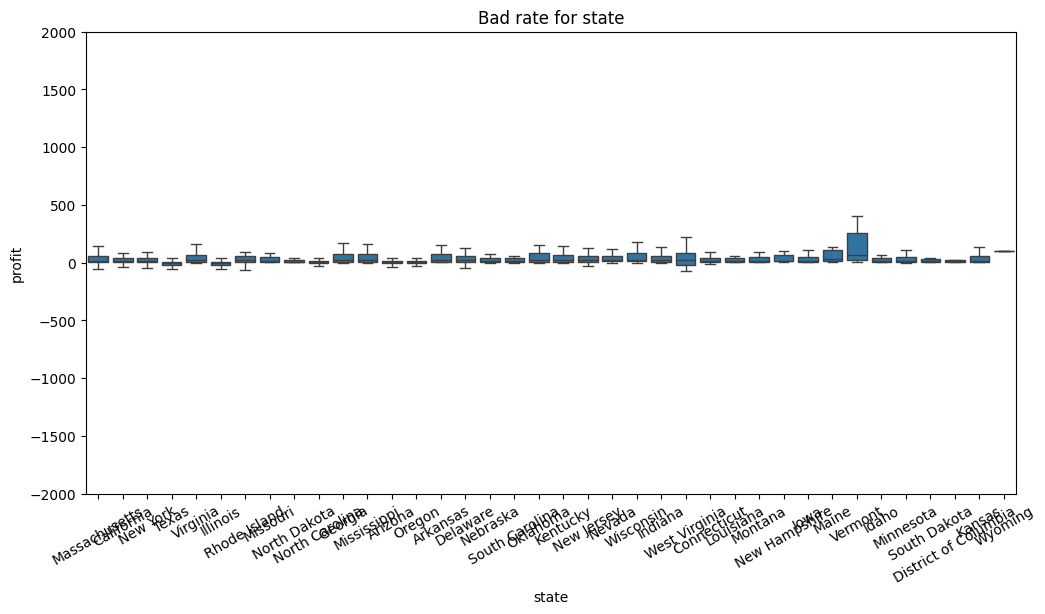

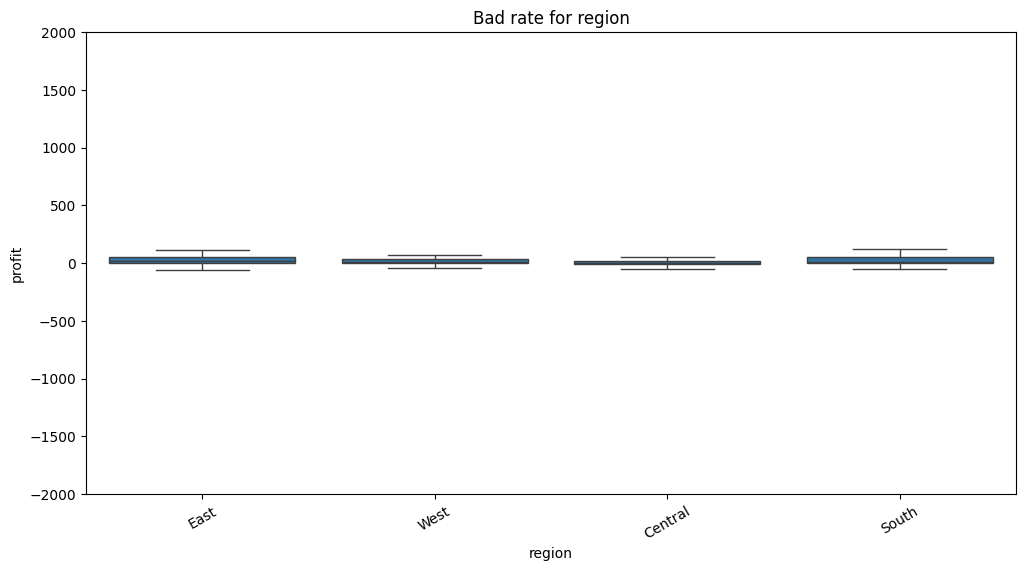

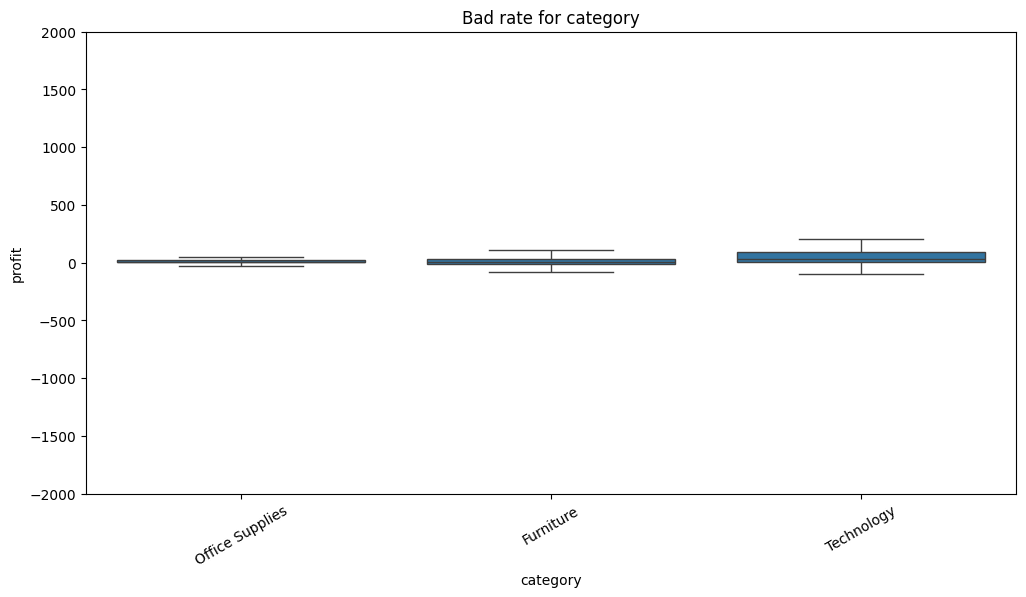

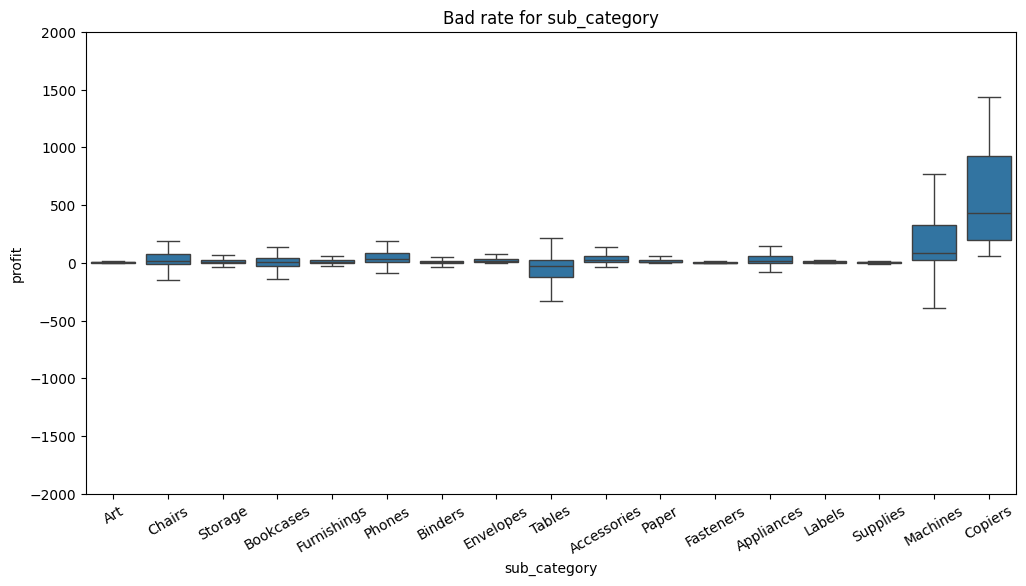

In [11]:
for feature in ['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category']:
    plt.figure(figsize=(12, 6)) 
    #sns.barplot(data=X_train, x=feature, y='profit', estimator=np.mean, ci=None)
    sns.boxplot(data=X_train, x=feature, y='profit', fliersize=0)
    plt.xticks(rotation=30)
    plt.ylim(-2000, 2000)
    plt.title(f'Bad rate for {feature}')
    plt.show()

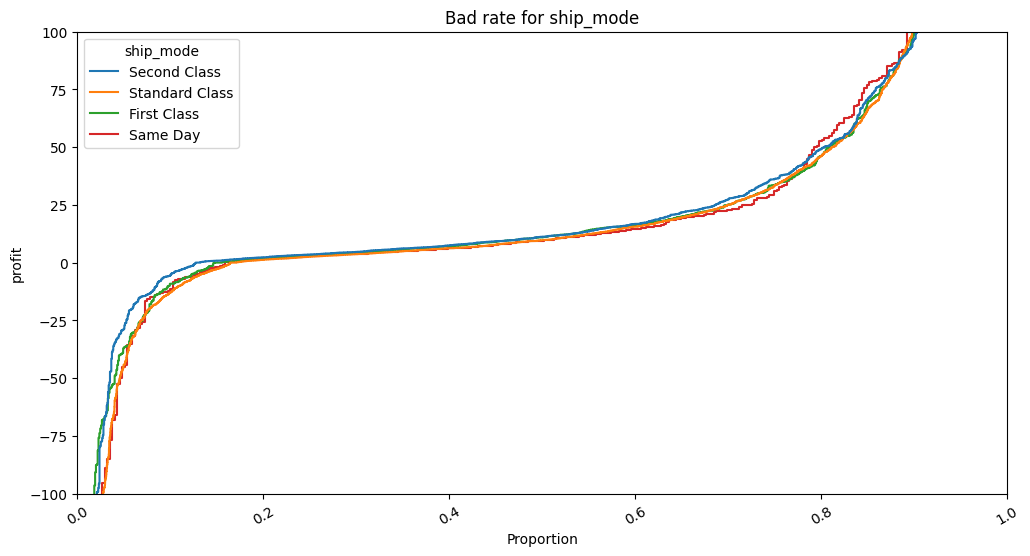

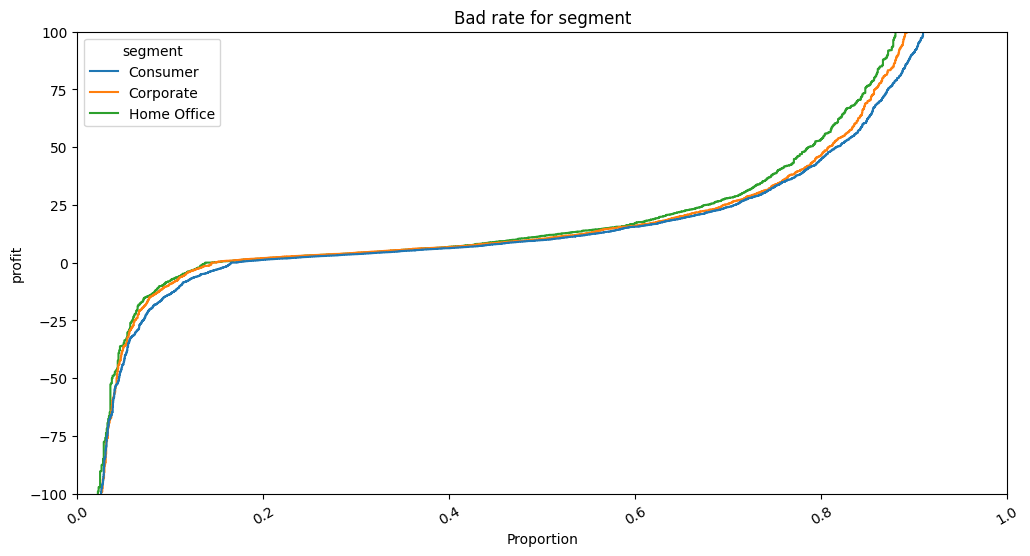

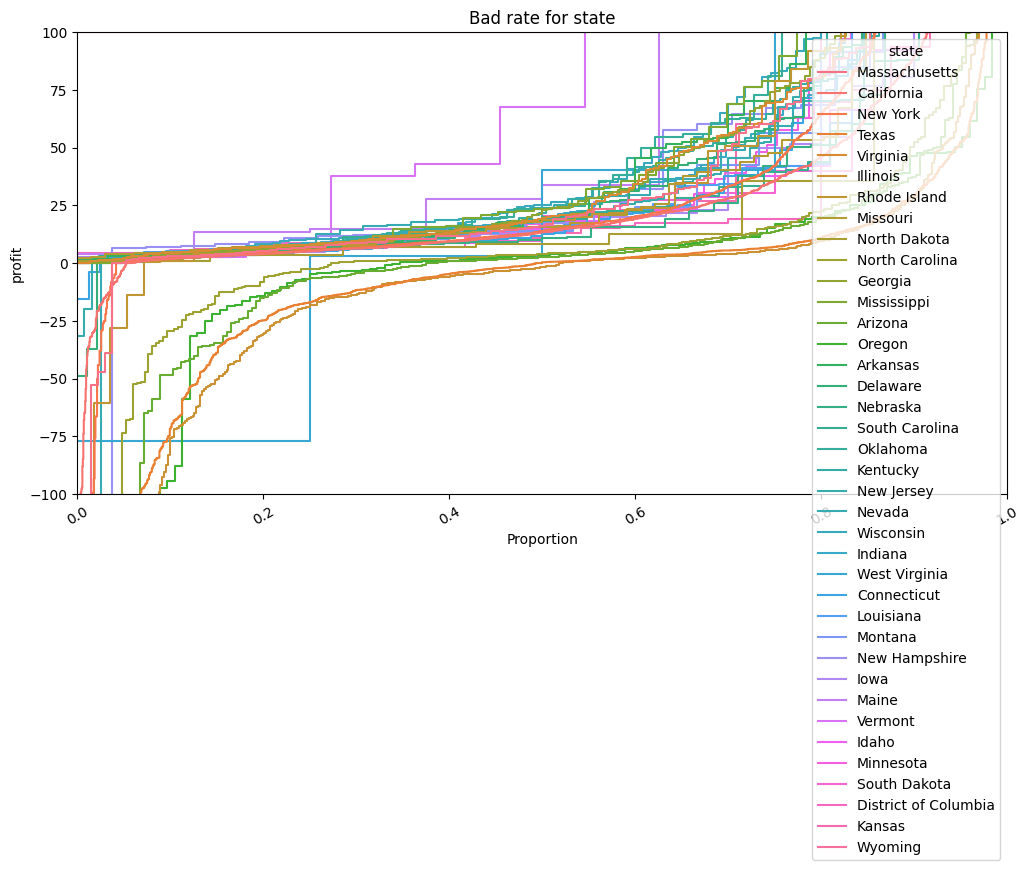

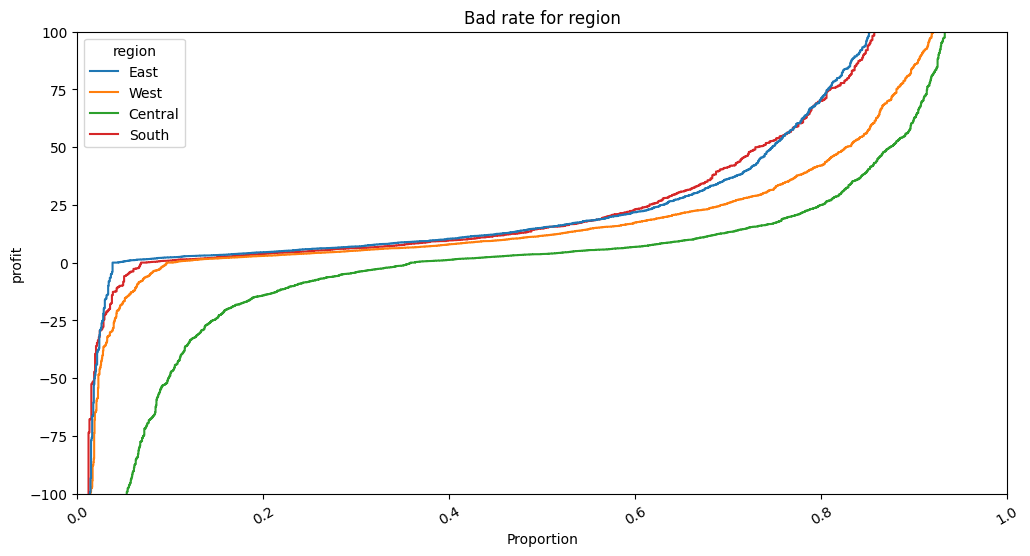

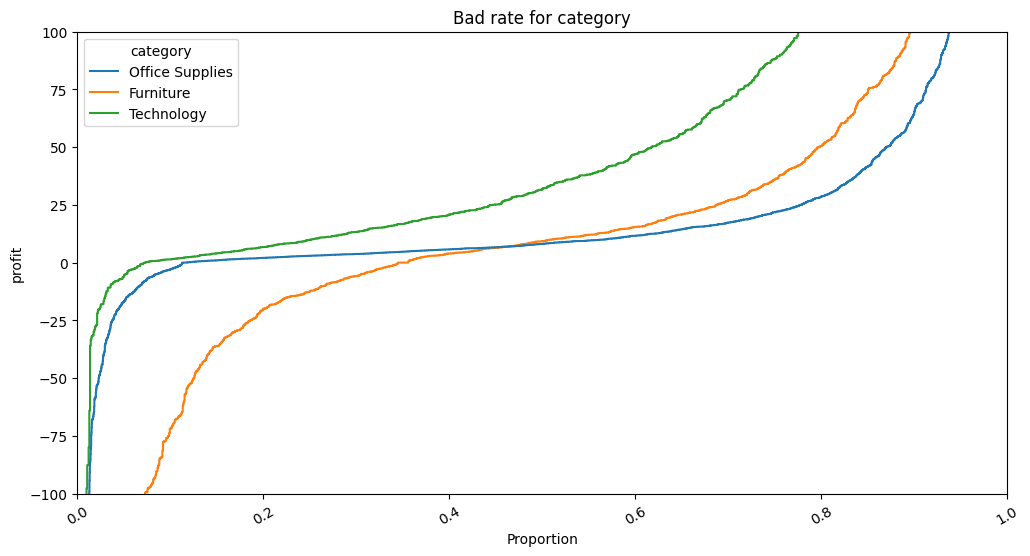

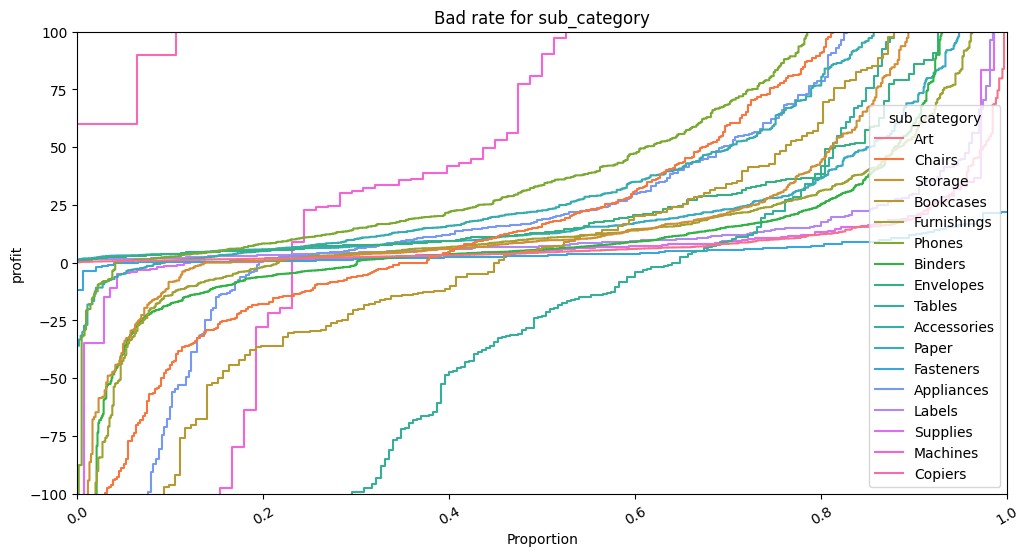

In [12]:
for feature in ['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category']:
    plt.figure(figsize=(12, 6)) 
    sns.ecdfplot(data=X_train, y='profit', hue=feature)
    plt.xticks(rotation=30)
    plt.ylim(-100, 100)
    plt.title(f'Bad rate for {feature}')
    plt.show()

In [13]:
X_train['sub_category'].value_counts()

sub_category
Binders        1058
Paper          1023
Furnishings     664
Phones          637
Storage         611
Art             574
Accessories     550
Chairs          442
Appliances      342
Labels          264
Tables          230
Envelopes       189
Bookcases       172
Fasteners       152
Supplies        140
Machines         78
Copiers          47
Name: count, dtype: int64

In [14]:
X_train['sub_category'].unique()

['Art', 'Chairs', 'Storage', 'Bookcases', 'Furnishings', ..., 'Appliances', 'Labels', 'Supplies', 'Machines', 'Copiers']
Length: 17
Categories (17, object): ['Art', 'Chairs', 'Storage', 'Bookcases', ..., 'Labels', 'Supplies', 'Machines', 'Copiers']

In [16]:
X_train['state'].value_counts()

state
California              2001
New York                1128
Texas                    985
Illinois                 492
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Arkansas                  60
Rhode Island              56
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada                    39
Nebraska                  38
Iowa                      30
New Hampshire             27
Kansas                    24
Idaho                     21
Montana                   15
South Dakota              12
Vermont                   11
District of Columbia      10
Maine   